# MSiA 422 Homework 1 -- Parth Patel

## Excerise 1: Procedural vs Functional Programming

### Problem Def: Given a list of numbers and words, find the count of each element type in the list.

In [105]:
#Part i) Create a function the will randomly generate a list of N numbers and words. Numbers and words count are random and the order is random too.

import random, string

def list_generator(list_len):
    #generate lists of random words and integers
    word_list = ['volatilizes', 'easterling', 'suppressionist', 'translocation', 'coenosarc', 'demerits', 'crown', 'disgraces', 'infirmness', 'sportswear', 'sermoniser', 'honeylocust', 'Asia', 'Brandywine', 'indicted', 'grandeur', 'cannon', 'ostension', 'tormenter', 'cosmochemist', 'hyperreal', 'meal', 'maleberry', 'mercurialities', 'halachist', 'tambourinists', 'onomatopoetic', 'excursional', 'reapparel', 'wintertide', 'thatching', 'terebration', 'owned', 'snobbishly', 'tomcatted', 'succos', 'diffusive', 'forelimbs', 'benefactress', 'sexperts', 'bagel', 'testosterone', 'conformance', 'thematology', 'nothing', 'sultrier', 'gelatinize', 'after', 'swashbucklingly', 'verve']
    num_list  = [random.randint(0,1000) for i in range(100)]
    #randomly select from these words and numbers lists to create output list
    L = random.choices(word_list+num_list,k=list_len)
    return L

#run the function to see an output
list_generator(10)

['thematology', 606, 474, 696, 571, 3, 867, 31, 313, 'maleberry']

In [106]:
#Part ii a) calculate the desired output with a procedural code by using loops

def count_element_type_procedural(L):
    
    numbers_count = 0
    words_count = 0
    for item in L:
        if type(item) == str:
            tmp = item.split()
            words_count = words_count + len(tmp)
        else:
            numbers_count += 1
    
    print("Count of numbers: ", numbers_count)
    print("Count of words: ", words_count)
    
#run provided example case
count_element_type_procedural([2, 3, 'word', -1, 'python programming language', 9, 321])

Count of numbers:  5
Count of words:  4


In [107]:
#Part ii b) calculate the desired output with a Functional code by using list comprehension.
def count_element_type_functional(L):
    numbers_count = len([i for i in L if type(i)==int])
    words_count = sum([len(i.split()) for i in L if type(i)==str])
    
    print("Count of numbers: ", numbers_count)
    print("Count of words: ", words_count)

In [108]:
#run provided example case
count_element_type_functional([2, 3, 'word', -1, 'python programming language', 9, 321])

Count of numbers:  5
Count of words:  4


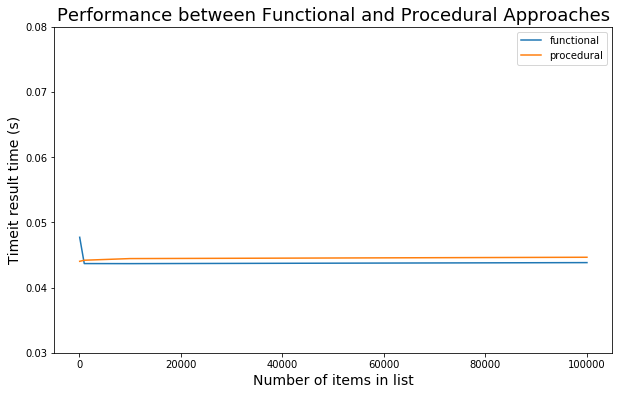

In [103]:
#Part iii Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions for different list sizes
import timeit 

def compare_times(method, N):
    func_in = "lambda: count_element_type_{}(list_generator({}))".format(method,N)
    time= timeit.timeit(func_in)
    return time

N_vals = [100, 1000, 10000, 100000]
func_times=[]
proc_times = []
for n in N_vals:
    func_times.append(compare_times('functional',n))
    proc_times.append(compare_times('procedural',n))
    
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(N_vals,func_times, label = 'functional')
plt.plot(N_vals,proc_times, label = 'procedural')
plt.title("Performance between Functional and Procedural Approaches", fontsize = 18)
plt.xlabel("Number of items in list",fontsize = 14)
plt.ylabel("Timeit result time (s)", fontsize =14)
plt.ylim((0.03,0.08))
plt.legend()
plt.show()

As expected the functional is slightly faster than the procedural but the oddity is that they are not scaling with N as one would expect.  I would think order n^1 scaling would apply here but it could be poor application of the Timeit module from my end.  Tried it with N_vals going up to 1E8 and saw the same behavior as above

## Exercise 2 – Simple Student Grading System - memory based

### Problem Def: Create a data structure (dict!) to store the class related information.

Create a data structure (dict!) to store the class related information.

In [6]:
import csv
with open("exams.csv", 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    student_dict = []
    for row in reader:
        row['final_score'] = 0.4*float(row['Exams'])+0.3*float(row['Quizzes'])+0.3*float(row['Projects'])
        if (row['final_score'] >= 90):
            row['letter_grade'] = 'A'
        elif (row['final_score'] >= 80) & (row['final_score'] < 90):
            row['letter_grade'] = 'B'
        elif (row['final_score'] >= 20) & (row['final_score'] < 80):
            row['letter_grade'] = 'C'
        elif (row['final_score'] >= 10) & (row['final_score'] < 20):
            row['letter_grade'] = 'D'
        else:
            row['letter_grade'] = 'F'
        student_dict.append(row)

Print out the structure

In [7]:
student_dict

[OrderedDict([('id', 'ID1'),
              ('Name', 'James'),
              ('Quizzes', '43'),
              ('Projects', '51'),
              ('Exams', '55'),
              ('final_score', 50.199999999999996),
              ('letter_grade', 'C')]),
 OrderedDict([('id', 'ID2'),
              ('Name', 'Josephine'),
              ('Quizzes', '76'),
              ('Projects', '84'),
              ('Exams', '87'),
              ('final_score', 82.80000000000001),
              ('letter_grade', 'B')]),
 OrderedDict([('id', 'ID3'),
              ('Name', 'Art'),
              ('Quizzes', '89'),
              ('Projects', '94'),
              ('Exams', '92'),
              ('final_score', 91.7),
              ('letter_grade', 'A')]),
 OrderedDict([('id', 'ID4'),
              ('Name', 'Lenna'),
              ('Quizzes', '70'),
              ('Projects', '67'),
              ('Exams', '64'),
              ('final_score', 66.7),
              ('letter_grade', 'C')]),
 OrderedDict([('id', 'ID5')

Provide the system user with a console based menu as defined in assignment

In [8]:
def print_menu(): 
    print(25 * "-" , "MENU" , 25 * "-")
    print("1. Load data set from exams.csv file")
    print("2. Print a list of student names, final scores,\n   and letter grades sorted by names")
    print("3. Print score summary")
    print("4. Identify +2 sigma students")
    print("5. Plot a pie chart of final grades distribution")
    print("6. Compute box plot params (min, max, median, Q1, Q3)")
    print("7. Exit system")
    print(57 * "-")

Menu option 1: Load the data set from exams.csv file

In [9]:
def menu1():
    f = open('exams.csv')
    data =f.readlines()
    print(data)

Menu option 2: Print a list of student names, final scores, and letter grades sorted by names.

In [10]:
def menu2():
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    print('Below is a list of lists containing: Name, Final Score, Letter Grade')
    print([[d['Name'],d['final_score'],d['letter_grade']] for d in student_sorted_dict])

Had to create a manual function to get the mode since there is no singular mode which causes statistics.mode to choke

In [11]:
def get_mode(list_in):
    a= [(list_in.count(x),x) for x in list_in]
    max_occur= max(a)[0]
    max_tuples = [item for item in a if item[0] == max_occur]
    modes = [x[1] for x in max_tuples]
    print('Modes are:', modes, 'they each occur', max_occur, 'times')

Menu option 3: Print score summary (Student Count, Min, Max, mean, mode, and standard deviation)

In [12]:
def menu3():
    import statistics as stats
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    final_scores=[d['final_score'] for d in student_sorted_dict]
    print('Number of students is: ',len(final_scores))
    print('Min Final Score is : ',round(min(final_scores),ndigits=2))
    print('Max Final Score is : ',max(final_scores))
    print('Mean of Final Scores is : ',round(stats.mean(final_scores),ndigits=2))
    print('Median of Final Scores is : ',stats.median(final_scores))
    ##mode doesnt work cause multiple solutions
    try:
        print('Mode of Final Scores is : ',stats.mode(final_scores))
    except stats.StatisticsError:
        get_mode(final_scores)
    print('Std dev of Final Scores is : ',round(stats.stdev(final_scores),ndigits=2))

Menu Option 4: Identify values that are larger than the mean and two times standard deviation

In [19]:
def menu4():
    import statistics as stats
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    final_scores=[[d['final_score'],d['Name']]for d in student_sorted_dict]
    mean_val = stats.mean([score[0] for score in final_scores])
    std_dev_val = stats.stdev([score[0] for score in final_scores])
    two_sigma = [item for item in final_scores if (item[0] > (mean_val+2*std_dev_val)) |(item[0] < (mean_val-2*std_dev_val)) ]
    print("These students/scores are 2 sigma from the mean:",sorted(two_sigma))

In [20]:
menu4()

These students/scores are 2 sigma from the mean: [[31.799999999999997, 'Albina'], [32.3, 'Blondell'], [38.8, 'Mitsue'], [97.9, 'Fatima'], [99.7, 'Dyan']]


Menu Option 5: Plot a pie chart showing the final letter grades distribution.

In [15]:
def menu5():
    import statistics as stats
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    letter_grades=[d['letter_grade'] for d in student_sorted_dict]
    letter_grade_dist = [(grade,letter_grades.count(grade)) for grade in set(letter_grades)]
    sizes = [grade_count[1] for grade_count in letter_grade_dist]
    labels = [grade_count[0] for grade_count in letter_grade_dist]
    fig1, ax1 = plt.subplots(figsize=(10,6))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 14})
    ax1.axis('equal')
    ax1.set_title('Letter Grade Distribution', fontsize=18)
    plt.show()

Menu option 6: Create box plots parameters (not drawing them but just computing the numbers [min, max, medial, Q1, Q3] for a box plot). 

In [16]:
def menu6():
    import statistics as stats
    import math
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    final_scores=[d['final_score'] for d in student_sorted_dict]
    print('Min Final Score is : ',round(min(final_scores),ndigits=2))
    print('Max Final Score is : ',max(final_scores))
    print('Median of Final Scores is : ',stats.median(final_scores))
    
    student_sorted_dict = sorted(student_dict, key=lambda x: x['Name']) 
    final_scores=[d['final_score'] for d in student_sorted_dict]
    final_scores_sorted = sorted(final_scores)
    q1_pos = round(0.25*(len(final_scores_sorted)+1))
    q3_pos = round(0.75*(len(final_scores_sorted)+1))
    
    if (q1_pos % 1 ==0):
        q1=final_scores_sorted[q1_pos]
    else:
        q1 = (final_scores_sorted[math.floor(q1_pos)]+final_scores_sorted[math.ceil(q1_pos)])/2
    
    if (q3_pos % 1 ==0):
        q3=final_scores_sorted[q3_pos]
    else:
        q1 = (final_scores_sorted[math.floor(q3_pos)]+final_scores_sorted[math.ceil(q3_pos)])/2
    
    print('Q1 value of Final Scores is: ',round(q1,ndigits=2))
    print('Q3 value of Final Scores is: ',q3)

    

Run the menu until exit is selected

------------------------- MENU -------------------------
1. Load data set from exams.csv file
2. Print a list of student names, final scores,
   and letter grades sorted by names
3. Print score summary
4. Identify +2 sigma students
5. Plot a pie chart of final grades distribution
6. Compute box plot params (min, max, median, Q1, Q3)
7. Exit system
---------------------------------------------------------
Enter your choice [1-7]: 1
Selected option 1

['id,Name,Quizzes,Projects,Exams\n', 'ID1,James,43,51,55\n', 'ID2,Josephine,76,84,87\n', 'ID3,Art,89,94,92\n', 'ID4,Lenna,70,67,64\n', 'ID5,Donette,63,59,58\n', 'ID6,Simona,65,69,68\n', 'ID7,Mitsue,41,43,34\n', 'ID8,Leota,63,72,70\n', 'ID9,Sage,56,71,65\n', 'ID10,Kris,60,66,65\n', 'ID11,Minna,41,49,43\n', 'ID12,Abel,53,54,50\n', 'ID13,Kiley,58,52,57\n', 'ID14,Graciela,69,79,74\n', 'ID15,Cammy,55,67,58\n', 'ID16,Mattie,73,69,72\n', 'ID17,Meaghan,69,81,76\n', 'ID18,Gladys,69,70,73\n', 'ID19,Yuki,82,81,79\n', 'ID20,Fletcher,66,79,76\n', 'ID21,

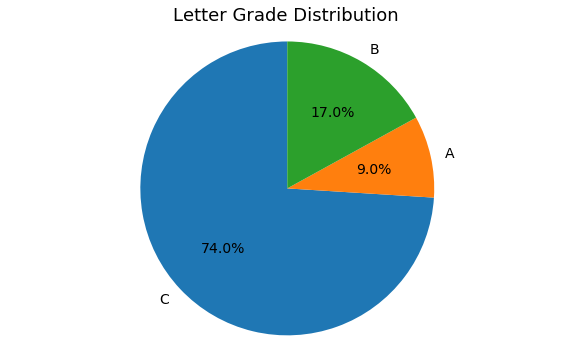

------------------------- MENU -------------------------
1. Load data set from exams.csv file
2. Print a list of student names, final scores,
   and letter grades sorted by names
3. Print score summary
4. Identify +2 sigma students
5. Plot a pie chart of final grades distribution
6. Compute box plot params (min, max, median, Q1, Q3)
7. Exit system
---------------------------------------------------------
Enter your choice [1-7]: 6
Selected option 6

Min Final Score is :  31.8
Max Final Score is :  99.7
Median of Final Scores is :  68.65
Q1 value of Final Scores is:  60.4
Q3 value of Final Scores is:  80.5
------------------------- MENU -------------------------
1. Load data set from exams.csv file
2. Print a list of student names, final scores,
   and letter grades sorted by names
3. Print score summary
4. Identify +2 sigma students
5. Plot a pie chart of final grades distribution
6. Compute box plot params (min, max, median, Q1, Q3)
7. Exit system
-------------------------------------

In [17]:
loop = 1
while loop==1:
    print_menu()
    selection = input("Enter your choice [1-7]: ")
    selection = int(selection)
    
    if selection==1: 
        print('Selected option 1\n')
        menu1()
    elif selection==2:
        print('Selected option 2\n')
        menu2()
    elif selection==3:
        print('Selected option 3\n')
        menu3()
    elif selection==4:
        print('Selected option 4\n')
        menu4()
    elif selection==5:
        print('Selected option 5\n')
        menu5()
    elif selection==6:
        print('Selected option 6\n')
        menu6()
    elif selection==7:
        print('Exiting system')
        loop = 0
    else:
        print('Not a valid selection')

## Exercise 3 – Pick an extension library from PyPI or other sources.   Summarize the functionality provided by the library and show an example of usage

I've chosen to discuss an open source python framework called Scrapy.  Scrapy is used for 'crawling' through web sites and extracting structured data.  This data can then be used for a wide range of applications like data mining, information processing or historical archival.  There are many web scraping packages for Python but Scrapy has gained popularity due to a few major advantages.  These being: low CPU usage, lower memory consumption, it has well-designed architecture resulting in robustness and flexibility, and easy to add custom functionalities to the pipeline.

Below is a usage example of scraping data from the MSiA student blog, namely grabbing the title of various blogs posted

In [19]:
import scrapy
from scrapy.crawler import CrawlerProcess

create spider to crawl on the MSiA blog page and retrieve blog titles

In [20]:
class msia_blog_spider(scrapy.Spider):
    name = 'msia_blog_spider'
    start_urls = ['https://sites.northwestern.edu/msia/']
    def parse(self, response):
        blog_names = []
        for blog in response.css("h2.entry-title"):
            title = blog.css('a::text').extract_first()
            print(title)

Initiate the spider and crawl process

In [21]:
process = CrawlerProcess()
process.crawl(msia_blog_spider)
process.start()

2019-09-26 20:09:58 [scrapy.utils.log] INFO: Scrapy 1.7.3 started (bot: scrapybot)
2019-09-26 20:09:58 [scrapy.utils.log] INFO: Versions: lxml 4.3.4.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.7.0, Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1c  28 May 2019), cryptography 2.7, Platform Windows-10-10.0.18362-SP0
2019-09-26 20:09:58 [scrapy.crawler] INFO: Overridden settings: {}
2019-09-26 20:09:58 [scrapy.extensions.telnet] INFO: Telnet Password: 9f2d9fa4e1b8cdd9
2019-09-26 20:09:58 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2019-09-26 20:09:59 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaul

Using Skills to Define and Measure Job Demand
Happy Baby to Goddess: Creativity in Yoga Sequencing with Markov Chains
Chocolate Chips and Fish Sauce: A Network Analysis and Visualization in Ingredient Pairings
Personalized Restaurant Recommender System Using A Hybrid Approach
Introducing a new rating system for World Rugby Union based on the ELO Rating System: The ELOR (ELO-Rugby)
AMI (Heart Attack) Likelihood Prediction Analysis
Semantic Network Analysis of Ideological Communities on Twitter
Real-Time Human Activity Classification in Videos
Chicago Botanic Garden: Members Relationship Management Project
Running a Marathon in 45 Seconds Flat
